Here we will take all the data we've collected and create a temporal data set to be used in the "Skygrid + covariates" analysis.

In [32]:
library(ggplot2)
library(reshape2)


Attaching package: ‘reshape2’

The following objects are masked from ‘package:reshape’:

    colsplit, melt, recast



### Load trade arrays

In [2]:
load(file = "../../DATA/TRADE_DATA/tradeArray_Cattle.RData")
load(file = "../../DATA/TRADE_DATA/tradeArray_Goats.RData")
load(file = "../../DATA/TRADE_DATA/tradeArray_Pigs.RData")
load(file = "../../DATA/TRADE_DATA/tradeArray_Sheep.RData")
load(file = "../../DATA/TRADE_DATA/tradeArray_Horses.RData")

In [58]:
### Auxiliary functions
get_overall_trade <- function(trade_array) {
    ans <- data.frame(
        year = as.numeric(dimnames(trade_array)$year),
        trade  = apply(trade_array, 3,
      function(mat) max(sum(mat[upper.tri(mat, diag = FALSE)]), sum(mat[lower.tri(mat, diag = FALSE)])) ) 
    )
    return(ans)
}

In [59]:
cattle.through.time <- get_overall_trade(Cattle)

In [60]:
## Do the other livestock
goats.through.time <- get_overall_trade(Goats)
pigs.through.time <- get_overall_trade(Pigs)
sheep.through.time <- get_overall_trade(Sheep)
horses.through.time <- get_overall_trade(Horses)

In [61]:
trade.through.time <- data.frame(
    year = cattle.through.time$year,
    cattle = cattle.through.time$trade,
    goats = goats.through.time$trade,
    pigs = pigs.through.time$trade,
    sheep = sheep.through.time$trade,
    horses = horses.through.time$trade
)
head(trade.through.time)
write.csv(trade.through.time, file = "../../DATA/TRADE_DATA/")

year,cattle,goats,pigs,sheep,horses
1986,27894,0,7487,84720,4258
1987,19642,0,5634,14059,3712
1988,6028,0,113,55641,1606
1989,120078,36,153345,35437,4584
1990,194729,29,13509,69707,3711
1991,184382,86,932,23570,9707


In [62]:
forPlot <- reshape2::melt(trade.through.time, id = c("year"), variable.name = "livestock", value.name = "trade")
forPlot$livestock <- as.factor(forPlot$livestock)
head(forPlot)

year,livestock,trade
1986,cattle,27894
1987,cattle,19642
1988,cattle,6028
1989,cattle,120078
1990,cattle,194729
1991,cattle,184382


Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Removed 8 rows containing non-finite values (stat_smooth).”

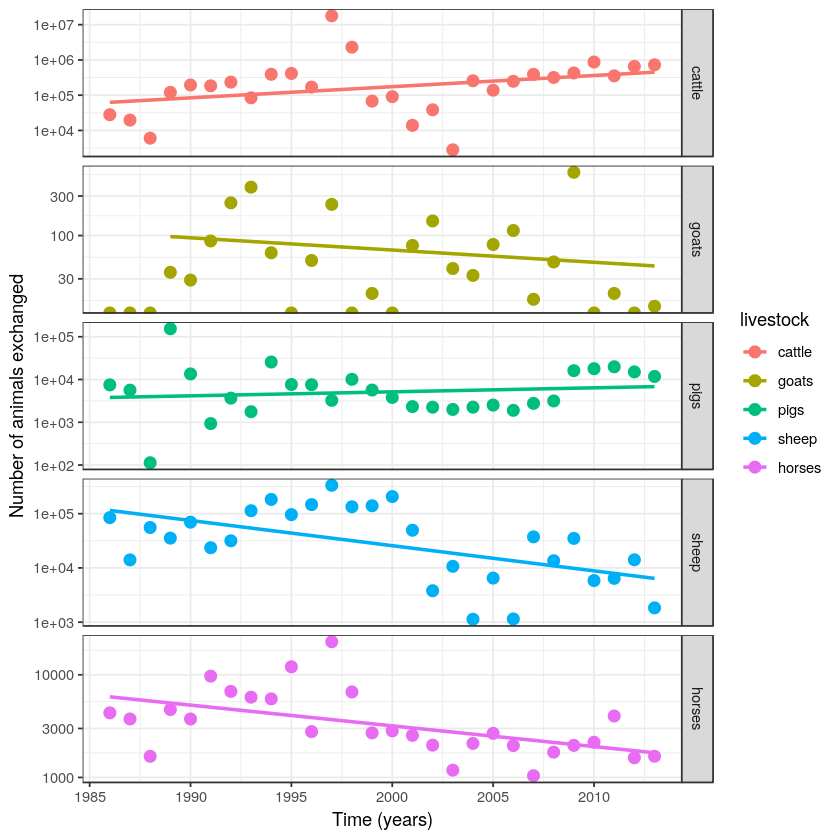

In [63]:
p <- ggplot(forPlot, aes(x = year, y = trade, colour = livestock, fill = livestock)) 
q <- p +
  geom_point(size = 3) +
  geom_smooth(method = "gam", se = FALSE) +
  scale_y_log10("Number of animals exchanged") + 
  scale_x_continuous("Time (years)") +
  facet_grid(livestock~., scales = "free_y") +
#   guides(fill = FALSE, colour = FALSE) +
  theme_bw()
q